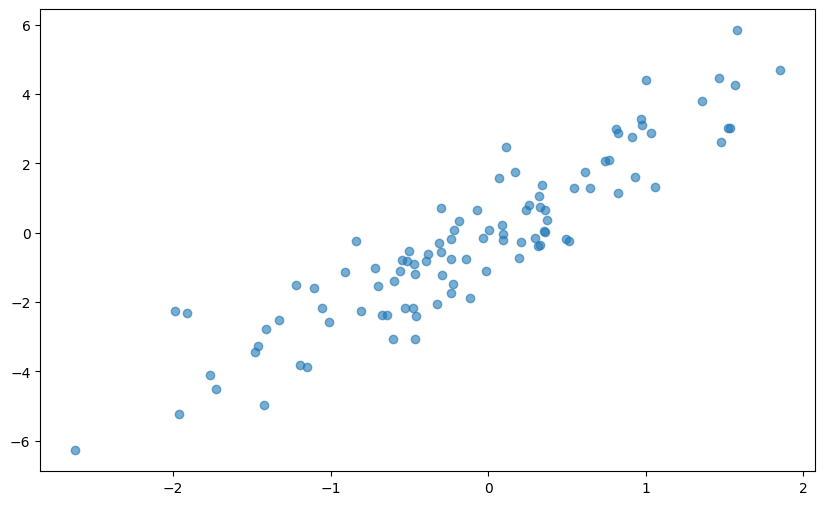

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 2D Data
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 2.5 * x + np.random.normal(0, 1, 100)  # Correlated feature
data = np.column_stack((x, y))
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Original Data')

In [12]:
# Step 2: Center the Data
mean = np.mean(data, axis=0)
centered_data = data - mean
print(mean)

[-0.10384652 -0.23731171]


In [13]:
# Step 3: Compute Covariance Matrix
cov_matrix = np.cov(centered_data, rowvar=False)
print(cov_matrix)

[[0.82476989 1.94377054]
 [1.94377054 5.47352537]]


In [11]:
# Step 4: Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Identify the principal component (eigenvector with largest eigenvalue)
principal_component = eigenvectors[:, np.argmax(eigenvalues)]
print(principal_component)

[-0.34123438 -0.93997824]


In [14]:
# Step 5: Project the Data
projected_data = centered_data @ principal_component.reshape(-1, 1)

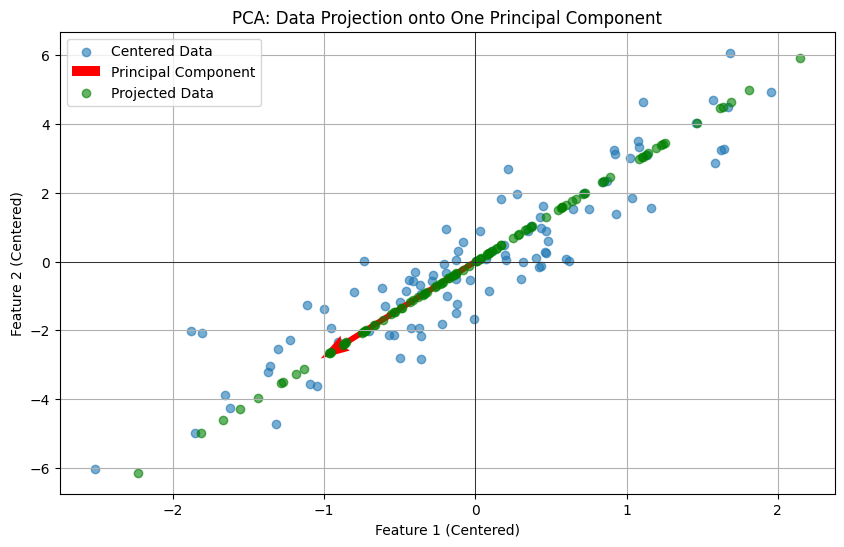

In [15]:
# Step 6: Visualize Results
plt.figure(figsize=(10, 6))

# Original data
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.6, label='Centered Data')

# Principal Component
pc_start = np.array([0, 0])
pc_end = principal_component * 3  # Scale for visualization
plt.quiver(*pc_start, *pc_end, angles='xy', scale_units='xy', scale=1, color='red', label='Principal Component')

# Projected data
projected_points = projected_data @ principal_component.reshape(1, -1)
plt.scatter(projected_points[:, 0], projected_points[:, 1], alpha=0.6, color='green', label='Projected Data')

# Plot settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("PCA: Data Projection onto One Principal Component")
plt.xlabel("Feature 1 (Centered)")
plt.ylabel("Feature 2 (Centered)")
plt.grid()
plt.show()